<a href="https://colab.research.google.com/github/KevinUnedo/machine-learning-clustering/blob/Group11_Project/Group11_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Mall Customer Segmentation data Using the Means Shift Method**

<style>
    table {
        font-family: Arial, sans-serif;
        font-size: 14px;
    }
    
    li {
        font-style: italic;
    }
</style>

<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">10S3001</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Kecerdasan Buatan</td>
    </tr>
    <tr>
        <td style="text-align:left">Topik</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>Mean Shift Clustering</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Group</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>11</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Team Members</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">
            <ul>
                <li>12S21002 - Marudut Budiman Tampubolon</li>
                <li>12S21006 - Weny S. M. Sitinjak</li>
                <li>12S21016 - Kevin Unedo Samosir</li>
                <li>12S21023 - Bintang Margaretha Situmorang</li>
            </ul>
        </td>
    </tr>
</table>


### **Importing library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

### **Importing file**

In [2]:
from google.colab import files

uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

### **Reading File**

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### **Data Visualization**

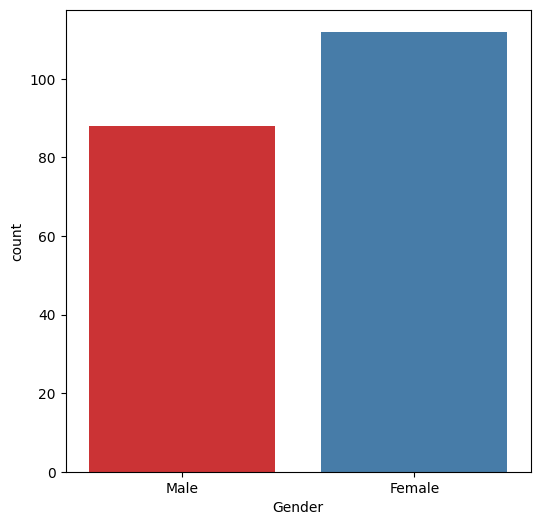

In [ ]:
plt.figure(1 , figsize = (6 , 6))
sns.countplot(x = 'Gender' , data = data, palette='Set1')
plt.show()

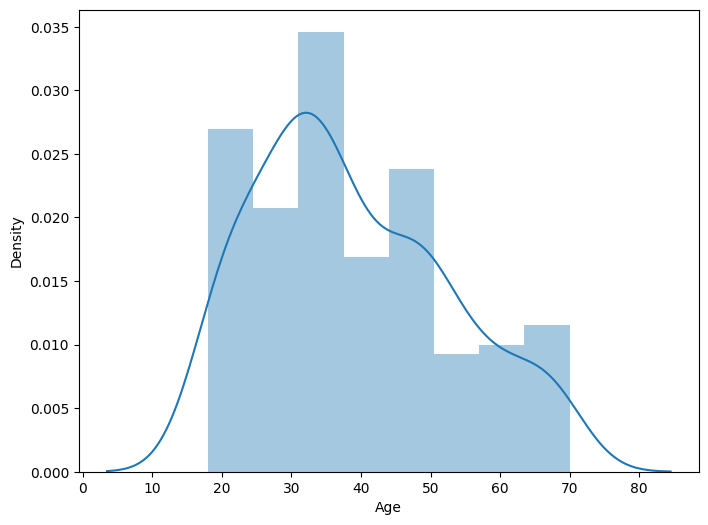

In [5]:
plt.figure(figsize=(8, 6))
sns.distplot(data["Age"])
plt.xlabel("Age")
plt.show()

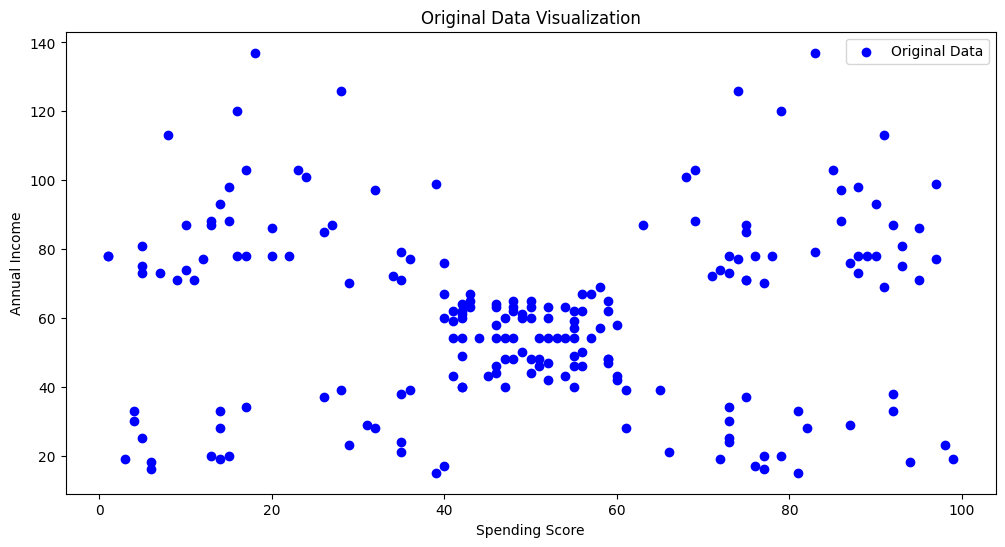

In [6]:
X = data[["Spending Score (1-100)","Annual Income (k$)"]]

#visualize data points
plt.figure(figsize=(12,6))
plt.scatter(X['Spending Score (1-100)'], X['Annual Income (k$)'], c='blue', label='Original Data')
plt.title('Original Data Visualization')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

In [8]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

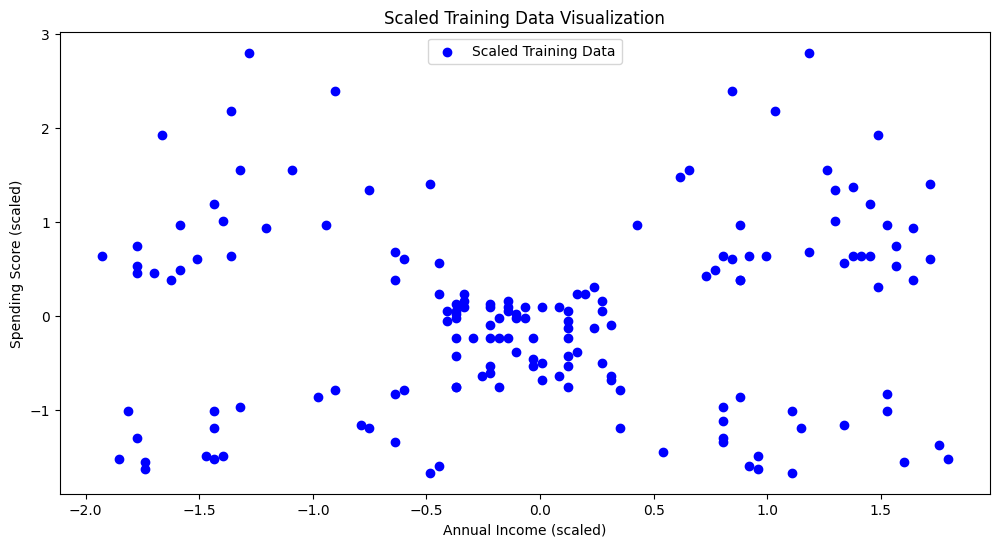

In [9]:
# Standardize the features on the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Visualize the scaled training data
plt.figure(figsize=(12,6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', label='Scaled Training Data')
plt.title('Scaled Training Data Visualization')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [10]:
# Estimate bandwidth using sklearn's estimate_bandwidth
bandwidth = estimate_bandwidth(X_train_scaled, quantile=0.2, n_samples=500)

In [11]:
# Create and fit the MeanShift model on the scaled training data
mean_shift_model = MeanShift(bandwidth=bandwidth)
cluster_labels_train = mean_shift_model.fit_predict(X_train_scaled)

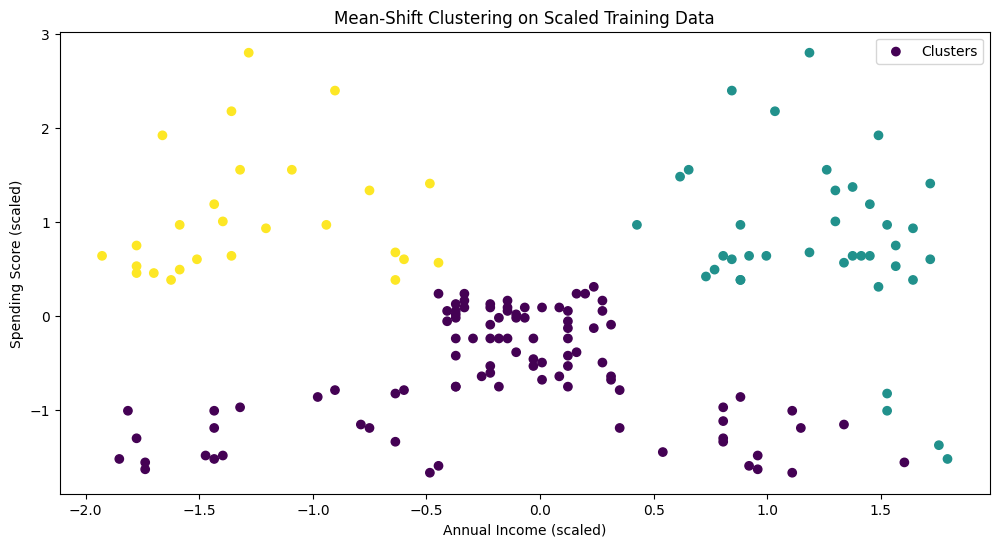

In [12]:
# Visualize the clusters on the scaled training data
plt.figure(figsize=(12,6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=cluster_labels_train, cmap='viridis', label='Clusters')
plt.title('Mean-Shift Clustering on Scaled Training Data')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

### **Evaluate Model**

#### **SILHOUETTE VALUE**

In [13]:
from sklearn.metrics import silhouette_score

# Assuming X_test_scaled is your scaled test data
X_test_scaled = scaler.transform(X_test)

# Predict clusters on the test data
cluster_labels_test = mean_shift_model.predict(X_test_scaled)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_test_scaled, cluster_labels_test)
print(f"Silhouette Score on Test Data: {silhouette_avg}")

Silhouette Score on Test Data: 0.5246114600923214


#### **DAVIES-BOULDIN SCORE**

In [14]:
from sklearn.metrics import davies_bouldin_score

# Assuming X_test_scaled is your scaled test data
X_test_scaled = scaler.transform(X_test)

# Predict clusters on the test data
cluster_labels_test = mean_shift_model.predict(X_test_scaled)

# Calculate Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(X_test_scaled, cluster_labels_test)
print(f"Davies-Bouldin Score on Test Data: {davies_bouldin_avg}")


Davies-Bouldin Score on Test Data: 0.5892520145685992
